<a href="https://colab.research.google.com/github/Fiarma5233/Data-Science/blob/master/Jewelry_Price_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objectif : Optimiser les prix de bijoux ( predire les prix des bijoux en fonction des caracteristiques des bijoux)

Importation des bibiotheques necessaires

In [ ]:
import os
path = "/content/drive/MyDrive/Amdari"
os.chdir(path)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
pwd

'/content/drive/MyDrive/Amdari'

In [ ]:
#Load data


df = pd.read_csv("Jewelry_Dataset.csv") # les caracteristiques sont anonymes

df.columns = [ # Par consequent on donnes les noms des colonnes

              "Order_Datetime",
              "Order_ID",
              "Product_Id",
              "SKU_Quantity",
              "Category_ID",
              "Category",
              "Brand_ID",
              "Price_USD",
              "User_ID",
              "Target_Gender",
              "Main_Color",
              "Main_Metal",
              "Main_Gem"

]
df

,Order_Datetime,Order_ID,Product_Id,SKU_Quantity,Category_ID,Category,Brand_ID,Price_USD,User_ID,Target_Gender,Main_Color,Main_Metal,Main_Gem
0,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.000000e+00,54.66,1.515916e+18,f,white,gold,sapphire
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,jewelry.pendant,0.000000e+00,88.90,1.515916e+18,f,red,gold,diamond
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,jewelry.necklace,0.000000e+00,417.67,1.515916e+18,NaN,red,gold,amethyst
4,2018-12-02 22:09:34 UTC,1925760595336888995,1835566854827934449,1,1.806829e+18,jewelry.earring,1.000000e+00,102.27,1.515916e+18,NaN,red,gold,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95905,2021-12-01 09:47:37 UTC,2719016587653808559,1515966223597820877,1,NaN,0.00,1.515916e+18,NaN,NaN,NaN,NaN,NaN,NaN
95906,2021-12-01 09:50:37 UTC,2719018098886705639,1956663830729720074,1,1.806829e+18,NaN,0.000000e+00,229.99,1.515916e+18,NaN,red,gold,NaN
95907,2021-12-01 09:52:06 UTC,2719018846999544322,1956663848219968336,1,1.806829e+18,jewelry.earring,1.000000e+00,630.00,1.515916e+18,f,white,gold,diamond
95908,2021-12-01 09:55:35 UTC,2719020596963836492,1835566854106513435,1,1.806829e+18,jewelry.earring,0.000000e+00,83.42,1.515916e+18,NaN,white,gold,fianit


In [ ]:
# Check for missing values
df.isnull().sum()

Order_Datetime        0
Order_ID              0
Product_Id            0
SKU_Quantity          0
Category_ID        5352
Category           9933
Brand_ID           4785
Price_USD          5352
User_ID            5352
Target_Gender     48167
Main_Color         7660
Main_Metal         5462
Main_Gem          34058
dtype: int64

In [ ]:
# Data shape
df.shape

(95910, 13)

In [ ]:
#Feature cardinality (nombres d'element unique de chaque colonne)
df.nunique()

Order_Datetime    74504
Order_ID          74759
Product_Id         9613
SKU_Quantity          1
Category_ID          25
Category            218
Brand_ID           2537
Price_USD          3166
User_ID           31079
Target_Gender         2
Main_Color            5
Main_Metal            3
Main_Gem             30
dtype: int64

In [ ]:
# Data description
df.describe()

,Order_ID,Product_Id,SKU_Quantity,Category_ID,Brand_ID,Price_USD,User_ID
count,9.591000e+04,9.591000e+04,95910.0,9.055800e+04,9.112500e+04,90558.000000,9.055800e+04
mean,2.485191e+18,1.815970e+18,1.0,1.805947e+18,8.891036e+16,362.213017,1.512644e+18
std,1.934750e+17,2.136814e+17,0.0,2.083954e+16,3.559651e+17,444.157665,2.374776e+16
min,1.924899e+18,1.313551e+18,1.0,1.313678e+18,0.000000e+00,0.990000,1.313554e+18
25%,2.379732e+18,1.515966e+18,1.0,1.806829e+18,0.000000e+00,145.620000,1.515916e+18
50%,2.524282e+18,1.956664e+18,1.0,1.806829e+18,1.000000e+00,258.770000,1.515916e+18
75%,2.644347e+18,1.956664e+18,1.0,1.806829e+18,1.000000e+00,431.370000,1.515916e+18
max,2.719022e+18,2.541962e+18,1.0,1.806829e+18,1.550613e+18,34448.600000,1.554297e+18


In [ ]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95910 entries, 0 to 95909
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_Datetime  95910 non-null  object 
 1   Order_ID        95910 non-null  int64  
 2   Product_Id      95910 non-null  int64  
 3   SKU_Quantity    95910 non-null  int64  
 4   Category_ID     90558 non-null  float64
 5   Category        85977 non-null  object 
 6   Brand_ID        91125 non-null  float64
 7   Price_USD       90558 non-null  float64
 8   User_ID         90558 non-null  float64
 9   Target_Gender   47743 non-null  object 
 10  Main_Color      88250 non-null  object 
 11  Main_Metal      90448 non-null  object 
 12  Main_Gem        61852 non-null  object 
dtypes: float64(4), int64(3), object(6)
memory usage: 9.5+ MB


In [ ]:
# duplicate values
num_duplicated = len(df.loc[df.duplicated()])

In [ ]:
print(f"Le nombre de lignes dupliquees est : \t  {num_duplicated}")

Le nombre de lignes dupliquees est : 	  2589


In [ ]:
# Feature with a cardinality of a 1(invariable feature)
invariant_features = df.nunique()[df.nunique() == 1].index.tolist()
invariant_features

['SKU_Quantity']

In [ ]:
# Check for label distribution
df['Price_USD'].skew()

18.95906072625981

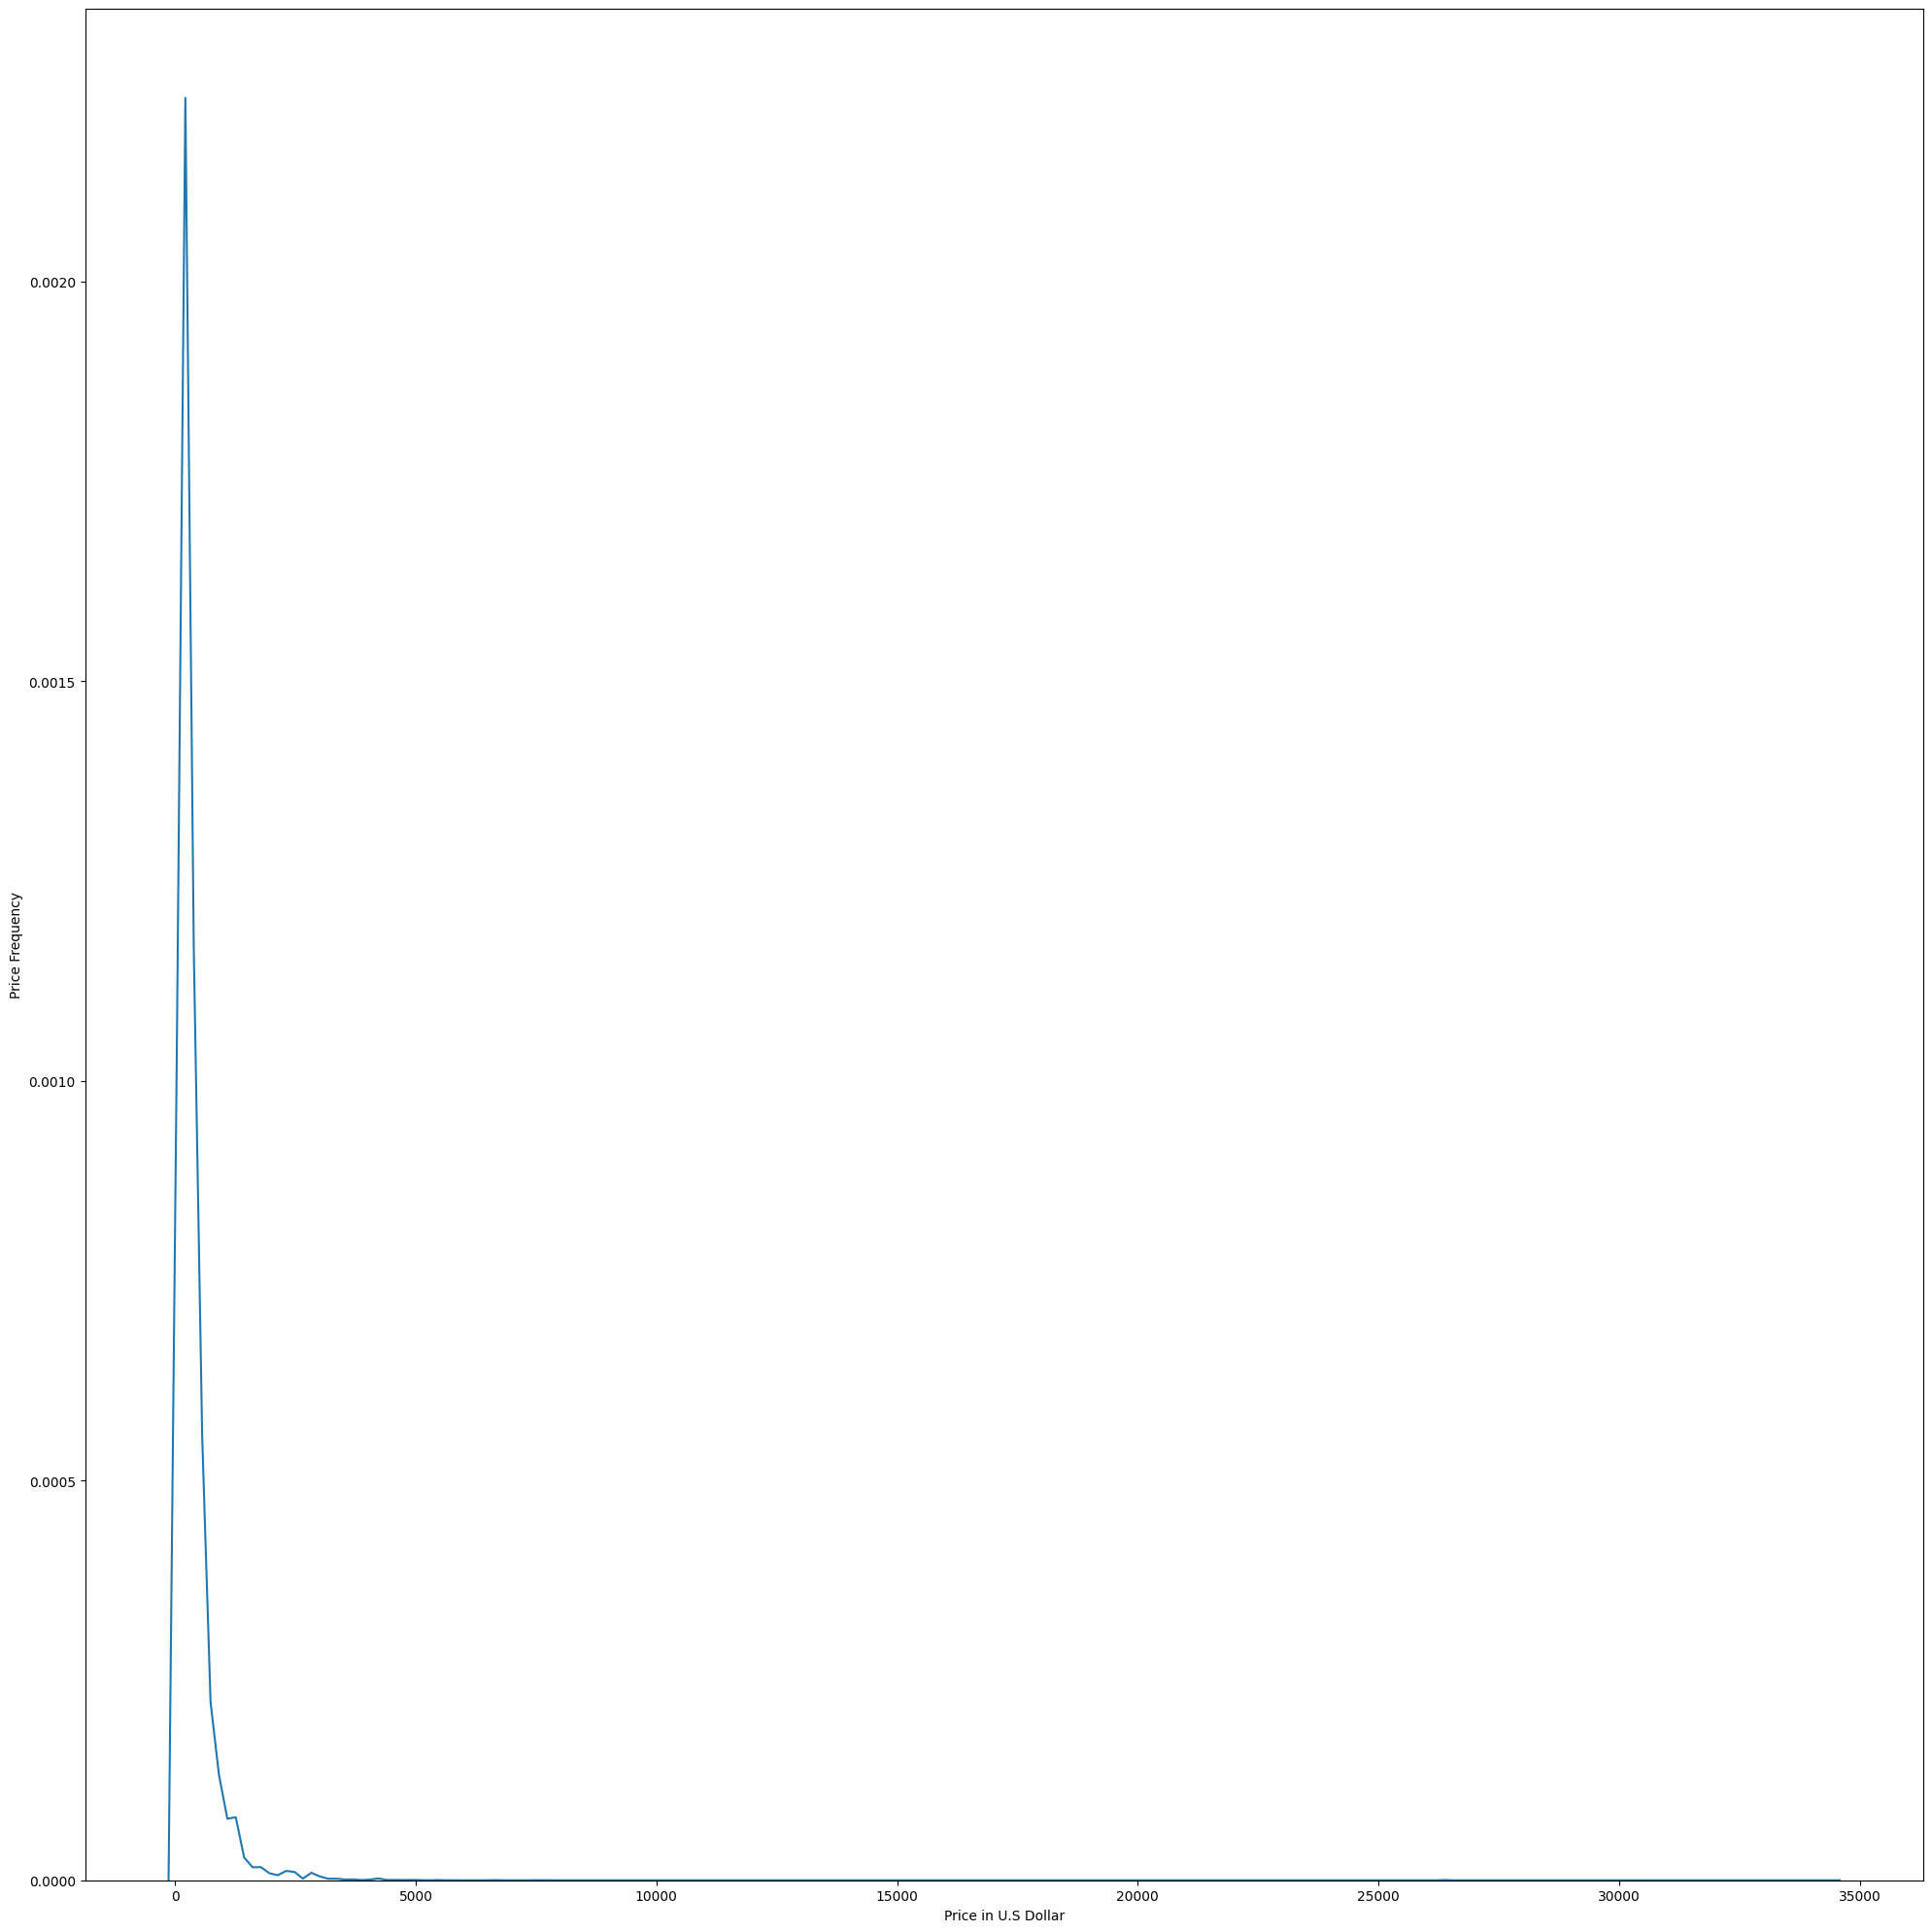

In [ ]:
#  visualization price distribution
plt.figure(figsize=(20,20))

sns.kdeplot(data=df, x="Price_USD")
plt.xlabel("Price in U.S Dollar")
plt.ylabel("Price Frequency")

plt.tight_layout();

In [ ]:
# target gender analysis
df['Target_Gender'].value_counts()


Target_Gender
f    47379
m      364
Name: count, dtype: int64

In [ ]:
# target gender analysis
df['Target_Gender'].value_counts(normalize = True)

Target_Gender
f    0.992376
m    0.007624
Name: proportion, dtype: float64

Text(0, 0.5, 'Gender Subpopulation')

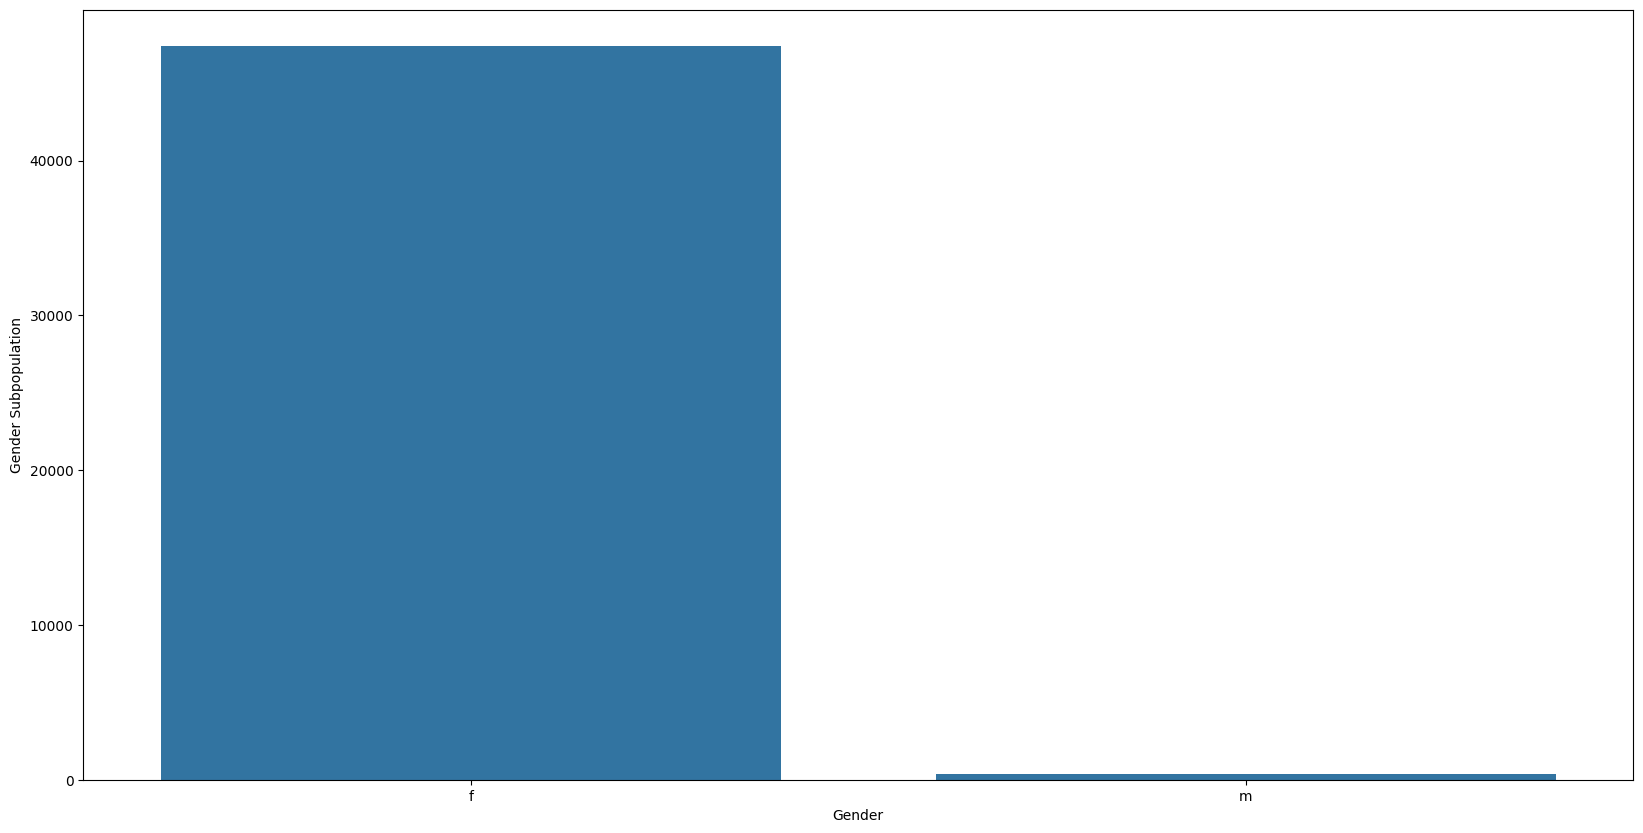

In [ ]:
# Visualize target gender
plt.figure(figsize=(20,10))
sns.countplot(data=df, x= "Target_Gender")
plt.xlabel("Gender")
plt.ylabel("Gender Subpopulation")

In [ ]:
# Categorie  analysis
df['Category'].value_counts()
# nous voyons que dan la categorie, il ya des nombres, ce qui n'a aucun sens ici

Category
jewelry.earring     29051
jewelry.ring        28300
jewelry.pendant     13088
jewelry.bracelet     6188
0.00                 4392
                    ...  
626.58                  1
13.42                   1
2.88                    1
101.23                  1
253.77                  1
Name: count, Length: 218, dtype: int64

In [ ]:
df['Category'].unique()
# nous voyons ici chaque element unique de la feature Categorie,
# comme mentionner precedemment, les nombres ici n'ont sens de plus que l'element 'electronics.clocks'
# ce sont des donnees corrompues.  IL va donc falloir les eliminer

array([nan, 'jewelry.pendant', 'jewelry.necklace', 'jewelry.earring',
       'jewelry.ring', 'jewelry.brooch', 'jewelry.bracelet',
       'electronics.clocks', 'jewelry.souvenir', '230.12', '202.36',
       '1098.03', '321.78', '1128.62', '81.27', '34.25', '582.16',
       '227.37', '234.22', '150.55', '131.82', '2123.15', '109.45',
       '49.22', '472.47', '205.38', '2746.44', '51.08', '231.12', '76.97',
       '3054.73', '184.90', '380.10', '357.49', '15.47', '135.33',
       '719.75', '93.01', '177.95', 'jewelry.stud', '102.10', '595.75',
       '469.56', '427.07', '53.62', '77.53', '1469.18', '355.27',
       '184.89', '154.66', '300.58', '83.73', '271.19', '3294.21',
       '278.04', '3626.26', '126.03', '283.52', '114.38', '89.04', '8.22',
       '124.88', '89.73', '171.23', '136.93', '19.04', '158.77', '187.10',
       '151.92', '1845.89', '87.23', '248.58', '596.48', '208.88',
       '193.11', '169.84', '1447.68', '45.07', '136.85', '282.05',
       '61.51', '210.21', '137.12'

In [ ]:
##  Extract actual  categories
categories = df['Category'].unique().tolist()
categories = [c for c in categories if isinstance(c, str) and 'jewelry' in c]
# ici on supprime toutes les donnees corrompues

In [ ]:
categories

['jewelry.pendant',
 'jewelry.necklace',
 'jewelry.earring',
 'jewelry.ring',
 'jewelry.brooch',
 'jewelry.bracelet',
 'jewelry.souvenir',
 'jewelry.stud']

In [ ]:
# Pick out authentic data based on categories
real_categories = df.loc[df['Category'].isin(categories)]
#ici , on remplaces les categorielles dans la colonne categorie

In [ ]:
# percentage of missing values
100 * df.isnull().sum() / len(df)

Order_Datetime     0.000000
Order_ID           0.000000
Product_Id         0.000000
SKU_Quantity       0.000000
Category_ID        5.580231
Category          10.356584
Brand_ID           4.989052
Price_USD          5.580231
User_ID            5.580231
Target_Gender     50.221041
Main_Color         7.986654
Main_Metal         5.694922
Main_Gem          35.510374
dtype: float64

In [ ]:
# percentage of missing values
100 * real_categories.isnull().sum() / len(real_categories)

Order_Datetime     0.000000
Order_ID           0.000000
Product_Id         0.000000
SKU_Quantity       0.000000
Category_ID        0.000000
Category           0.000000
Brand_ID           4.309081
Price_USD          0.000000
User_ID            0.000000
Target_Gender     44.842029
Main_Color         2.656044
Main_Metal         0.110617
Main_Gem          24.232519
dtype: float64

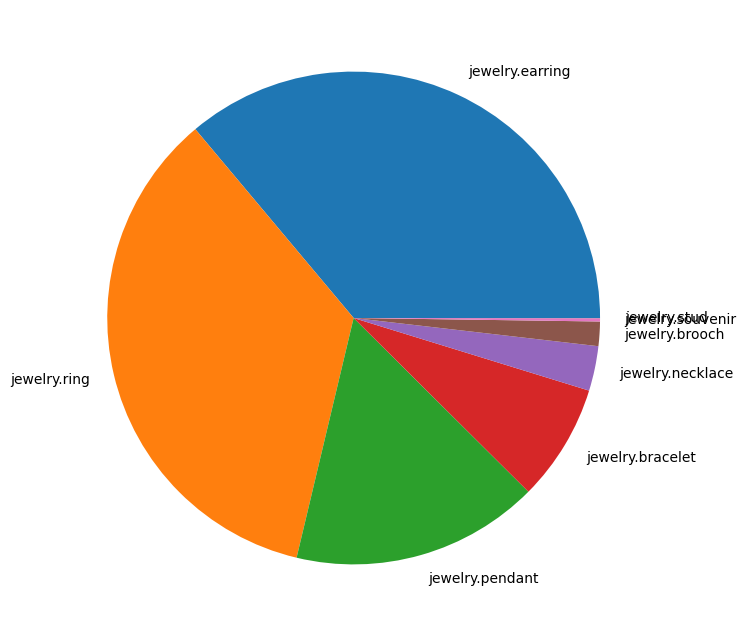

In [ ]:
# Visualize  jewelry categories
subdata = real_categories['Category'].value_counts()
jewelry_categories, counts = subdata.index.tolist(), subdata.values.tolist()

plt.figure(figsize=(12,8))
plt.pie(x= counts, labels=jewelry_categories);

Text(0, 0.5, 'Jewelry frequency')

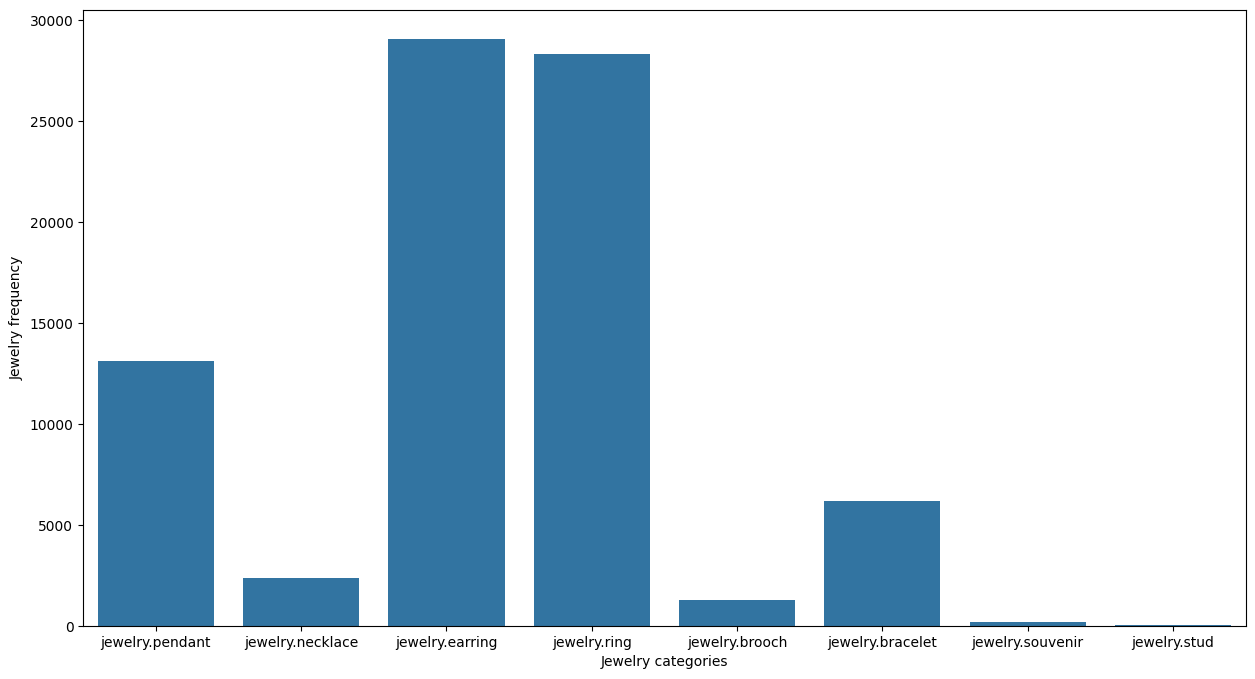

In [ ]:
# category count plot
plt.figure(figsize=(15,8))
sns.countplot(data=real_categories, x="Category")

plt.xlabel("Jewelry categories")
plt.ylabel("Jewelry frequency")

Text(0, 0.5, 'Frequency')

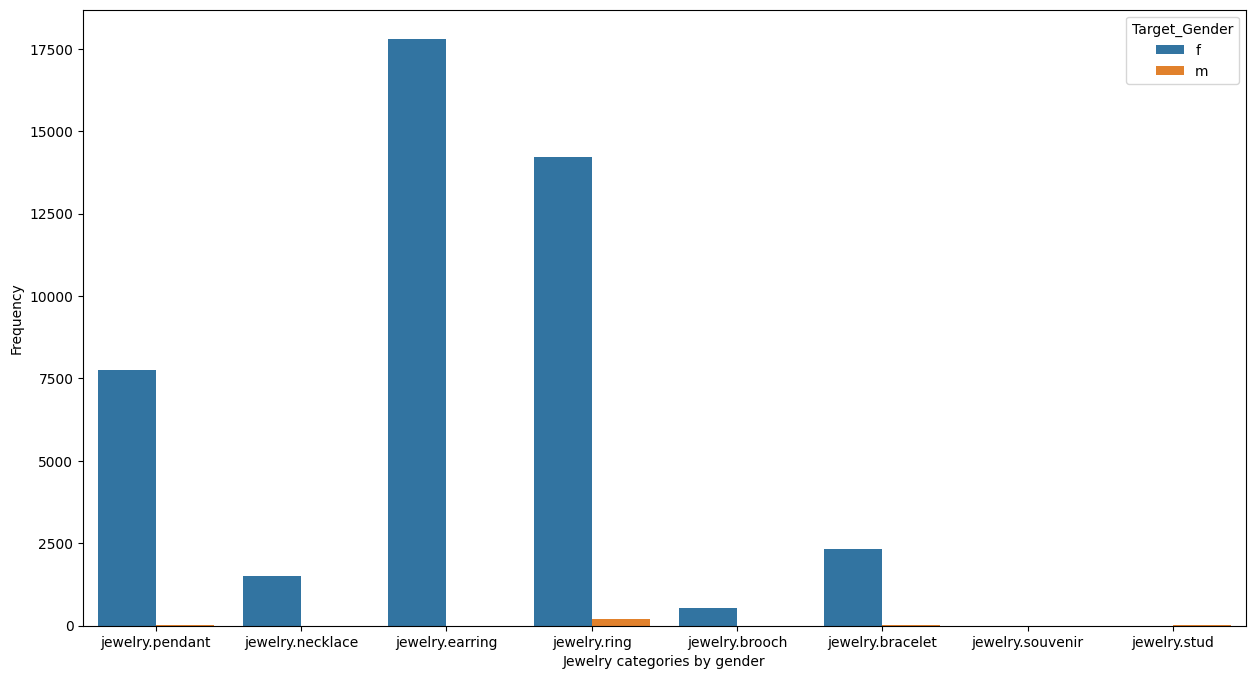

In [ ]:
#  Jewelry category by gender
plt.figure(figsize=(15,8))
sns.countplot(data=real_categories, x="Category", hue="Target_Gender")

plt.xlabel("Jewelry categories by gender")
plt.ylabel("Frequency")

In [ ]:
# Gender skew in original data
df['Target_Gender'].value_counts(normalize = True)

Target_Gender
f    0.992376
m    0.007624
Name: proportion, dtype: float64

In [ ]:
# Gender skew in real_categories data
real_categories['Target_Gender'].value_counts(normalize = True)

Target_Gender
f    0.994434
m    0.005566
Name: proportion, dtype: float64

In [ ]:
# encode jewelry categories
encoded, category_code  = pd.factorize(real_categories['Category'])
real_categories.loc[:, "Category"] = encoded

In [ ]:
# encode gender
encoded, category_code  = pd.factorize(real_categories['Target_Gender'])
real_categories.loc[:, "Target_Gender"] = encoded

In [ ]:
# encode gems
encoded, category_code  = pd.factorize(real_categories['Main_Gem'])
real_categories.loc[:, "Main_Gem"] = encoded

In [ ]:
# encode color
encoded, category_code  = pd.factorize(real_categories['Main_Color'])
real_categories.loc[:, "Main_Color"] = encoded

In [ ]:
# encode metal
encoded, category_code  = pd.factorize(real_categories['Main_Metal'])
real_categories.loc[:, "Main_Metal"] = encoded

In [ ]:
real_categories

,Order_Datetime,Order_ID,Product_Id,SKU_Quantity,Category_ID,Category,Brand_ID,Price_USD,User_ID,Target_Gender,Main_Color,Main_Metal,Main_Gem
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,0,1.0,54.66,1.515916e+18,0,0,0,0
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,0,0.0,88.90,1.515916e+18,0,1,0,1
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,1,0.0,417.67,1.515916e+18,-1,1,0,2
4,2018-12-02 22:09:34 UTC,1925760595336888995,1835566854827934449,1,1.806829e+18,2,1.0,102.27,1.515916e+18,-1,1,0,-1
5,2018-12-02 22:09:34 UTC,1925760595336888995,1600021442638905547,1,1.806829e+18,2,0.0,150.55,1.515916e+18,-1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95900,2021-12-01 09:32:35 UTC,2719009022110859402,1956663836207481431,1,1.806829e+18,3,0.0,145.62,1.515916e+18,-1,1,0,-1
95903,2021-12-01 09:37:28 UTC,2719011482355368159,1956663847389495299,1,1.806829e+18,2,0.0,301.23,1.515916e+18,-1,1,0,2
95907,2021-12-01 09:52:06 UTC,2719018846999544322,1956663848219968336,1,1.806829e+18,2,1.0,630.00,1.515916e+18,0,0,0,1
95908,2021-12-01 09:55:35 UTC,2719020596963836492,1835566854106513435,1,1.806829e+18,2,0.0,83.42,1.515916e+18,-1,0,0,3


In [ ]:
# features correlations
correlations = real_categories.drop(labels=['Order_Datetime', 'User_ID', 'Order_ID', 'Product_Id'], axis=1).corr(method= "spearman")
correlations

,SKU_Quantity,Category_ID,Category,Brand_ID,Price_USD,Target_Gender,Main_Color,Main_Metal,Main_Gem
SKU_Quantity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category_ID,NaN,1.000000,-0.886212,0.111328,-0.296495,0.106286,0.003396,0.157834,0.050483
Category,NaN,-0.886212,1.000000,-0.111680,0.267257,-0.124101,-0.059402,0.105056,-0.082944
Brand_ID,NaN,0.111328,-0.111680,1.000000,-0.018428,0.623701,0.100816,0.003835,0.076277
Price_USD,NaN,-0.296495,0.267257,-0.018428,1.000000,0.049532,0.013177,-0.173050,-0.006630
Target_Gender,NaN,0.106286,-0.124101,0.623701,0.049532,1.000000,0.056950,-0.046436,0.166125
Main_Color,NaN,0.003396,-0.059402,0.100816,0.013177,0.056950,1.000000,-0.238080,0.136232
Main_Metal,NaN,0.157834,0.105056,0.003835,-0.173050,-0.046436,-0.238080,1.000000,-0.055603
Main_Gem,NaN,0.050483,-0.082944,0.076277,-0.006630,0.166125,0.136232,-0.055603,1.000000


<Axes: >

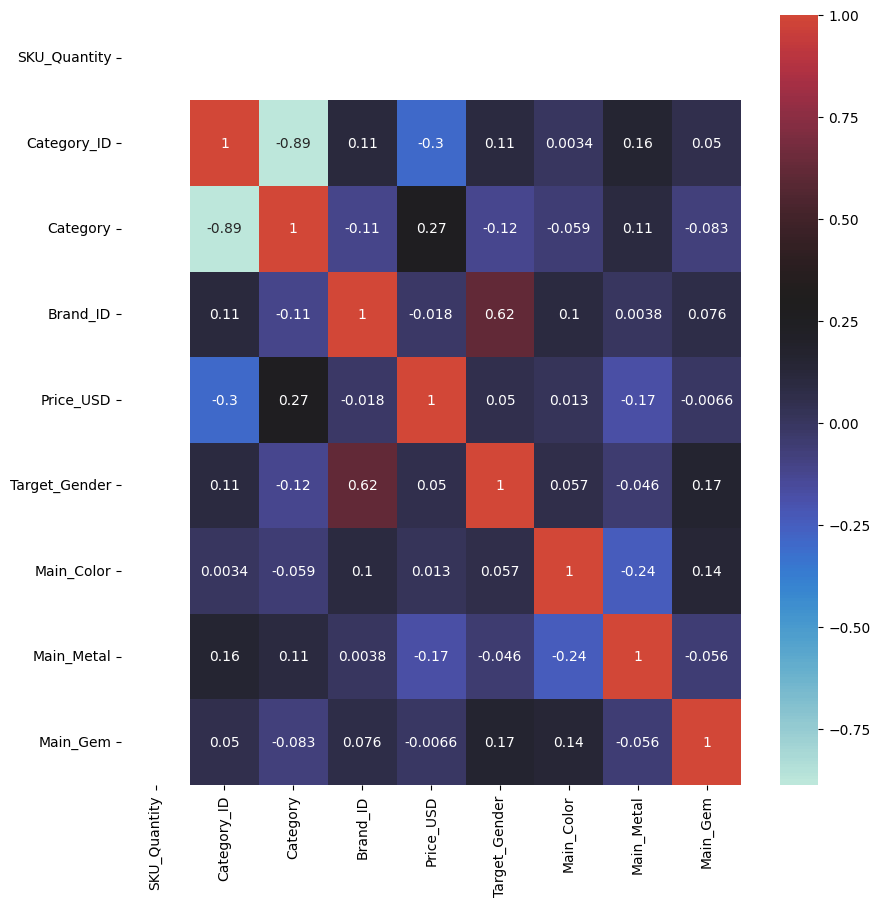

In [ ]:
# correlation heatmap

plt.figure(figsize=(10,10))
sns.heatmap(correlations, annot=True, center=.3)

In [ ]:
# set correlations limts
upper = 1
lower =.2

# explicitly obtain correlates features
correlated_columns = {
    column : correlations[(correlations[column] > lower) & (upper > correlations[column])].index.tolist()
    for column in correlations.columns
}

In [ ]:
correlated_columns

{'SKU_Quantity': [],
 'Category_ID': [],
 'Category': ['Price_USD'],
 'Brand_ID': ['Target_Gender'],
 'Price_USD': ['Category'],
 'Target_Gender': ['Brand_ID'],
 'Main_Color': [],
 'Main_Metal': [],
 'Main_Gem': []}

Data preparing


In [ ]:
# columns to eleminate
# on suprime les colonnes qui ne sont  pas necessaire

columns_to_eleminate = {
    'SKU_Quantity',
    'Order_ID',
    'Product_Id',
    'Category_ID',
    'User_ID',
}

In [ ]:
# Elemainate unused features
df.drop(labels=columns_to_eleminate, axis=1, inplace=True)

In [ ]:
# Elemainate unused feature Order_Datetime forgot
df.drop(labels=['Order_Datetime'], axis=1, inplace=True)

In [ ]:
df.head()

,Category,Brand_ID,Price_USD,Target_Gender,Main_Color,Main_Metal,Main_Gem
0,NaN,NaN,212.14,NaN,yellow,gold,NaN
1,jewelry.pendant,1.0,54.66,f,white,gold,sapphire
2,jewelry.pendant,0.0,88.90,f,red,gold,diamond
3,jewelry.necklace,0.0,417.67,NaN,red,gold,amethyst
4,jewelry.earring,1.0,102.27,NaN,red,gold,NaN


In [ ]:
# eliminate unrealistic categories
df = df.loc[df["Category"].isin(categories), :]

In [ ]:
df.shape

(80458, 7)

In [ ]:
# Import sklearn library
from sklearn.model_selection import train_test_split

In [ ]:
# Separate features from label
X = df.drop("Price_USD", axis=1)
y = df['Price_USD']

In [ ]:
# Create train, test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

Data modeling

In [ ]:
# Encode categorical feature(if required)
# Account for target skew
# Fix missing values

In [ ]:
from sklearn.preprocessing import  OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.compose import TransformedTargetRegressor, ColumnTransformer
from  sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# import models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  AdaBoostRegressor, ExtraTreesRegressor

#!pip install catboost

from catboost import CatBoostRegressor


In [ ]:
def generate_pipeline(model, column_indices, categorical_indices, fill_missing=True, one_hot=True, label_encode= False ):

  # fix  missing values
  first_transformer = ColumnTransformer(
      transformers = [
          ("imputer", SimpleImputer(strategy= "most_frequent"), column_indices)
      ],
      remainder = "passthrough",
      sparse_threshold =  0.
  )

  #One hot encode
  second_transformer = ColumnTransformer(
      transformers = [
          ("one_hot", OneHotEncoder(), categorical_indices)
      ],
      remainder = "passthrough",
      sparse_threshold =  0.
  )

  # Label encode
  third_transformer = ColumnTransformer(
      transformers = [
          ("ordinal", OrdinalEncoder(), categorical_indices)
      ],
      remainder = "passthrough",
      sparse_threshold =  0.
  )

  steps = []

  if fill_missing:
    steps.append(("first", first_transformer))

  if one_hot:
    steps.append(("second", second_transformer))


  if label_encode:
      steps.append(("third", third_transformer))

  steps.append(("model", model))
  model_pipe = Pipeline(steps = steps)

  return model_pipe

In [ ]:
# Generate  indices

columns = X.columns.tolist()
column_indices = [columns.index(c) for c in columns]
categorical_features = [c for c in columns if c not in ['Brand_ID']]
categorical_indices = [columns.index(c) for c in categorical_features]
categorical_indices

[0, 2, 3, 4, 5]

In [ ]:
# CatBoost pipeline
cat_pipe = generate_pipeline(
    CatBoostRegressor(loss_function="RMSE", iterations=10000, learning_rate=0.1, one_hot_max_size=2),
    column_indices,
    categorical_indices,
    fill_missing =False ,
    one_hot = False,
    label_encode = True
)

In [ ]:
Ce projet m'a permis de predire (optimiser ) les prix  des  bijoux d'une bijouterie .
Model: supervise
Algorithmes: LinearRegression, AdaBoostRegressor, CatBoostRegressor, ExtraTreesRegressor
L'entrainement de chacun de ces models et les resultats de leurs predictions m'ont permis de choisir le meilleur model pour optimiser les prix des bijoux.

In [ ]:
# Linear Regression pipeline
lin_pipe = generate_pipeline(
    LinearRegression(),
    column_indices,
    categorical_indices,
    fill_missing = True,
    one_hot = True,
    label_encode = False
)

In [ ]:
# AdaBoost pipeline
ada_pipe = generate_pipeline(
    AdaBoostRegressor(loss="exponential", n_estimators=1000, learning_rate=.01  ),
    column_indices,
    categorical_indices,
    fill_missing = True,
    one_hot = True,
    label_encode = False
)

In [ ]:
# ExtractTress pipeline
extra_pipe = generate_pipeline(
    ExtraTreesRegressor(criterion="friedman_mse", n_estimators=1000, bootstrap=True),
    column_indices,
    categorical_indices,
    fill_missing = True,
    one_hot = True,
    label_encode = False
)

In [ ]:
from sklearn.preprocessing import PowerTransformer

In [ ]:
# Transform target
cat_pipe = TransformedTargetRegressor(regressor=cat_pipe, transformer=PowerTransformer(method="box-cox"))
lin_pipe = TransformedTargetRegressor(regressor=lin_pipe, transformer=PowerTransformer(method="box-cox"))
ada_pipe = TransformedTargetRegressor(regressor=ada_pipe, transformer=PowerTransformer(method="box-cox"))
extra_pipe = TransformedTargetRegressor(regressor=extra_pipe, transformer=PowerTransformer(method="box-cox"))

In [ ]:
# Fit CatBoost
cat_pipe.fit(X_train, y_train)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
5000:	learn: 0.6140474	total: 1m 5s	remaining: 1m 5s
5001:	learn: 0.6140473	total: 1m 5s	remaining: 1m 5s
5002:	learn: 0.6140473	total: 1m 5s	remaining: 1m 5s
5003:	learn: 0.6140472	total: 1m 5s	remaining: 1m 5s
5004:	learn: 0.6140472	total: 1m 5s	remaining: 1m 5s
5005:	learn: 0.6140468	total: 1m 5s	remaining: 1m 5s
5006:	learn: 0.6140468	total: 1m 5s	remaining: 1m 5s
5007:	learn: 0.6140462	total: 1m 5s	remaining: 1m 5s
5008:	learn: 0.6140458	total: 1m 5s	remaining: 1m 5s
5009:	learn: 0.6140457	total: 1m 5s	remaining: 1m 5s
5010:	learn: 0.6140455	total: 1m 5s	remaining: 1m 5s
5011:	learn: 0.6140455	total: 1m 5s	remaining: 1m 5s
5012:	learn: 0.6140454	total: 1m 5s	remaining: 1m 4s
5013:	learn: 0.6140454	total: 1m 5s	remaining: 1m 4s
5014:	learn: 0.6140454	total: 1m 5s	remaining: 1m 4s
5015:	learn: 0.6140454	total: 1m 5s	remaining: 1m 4s
5016:	learn: 0.6140453	total: 1m 5s	remaining: 1m 4s
5017:	learn: 0.614045

TransformedTargetRegressor(regressor=Pipeline(steps=[('third',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('ordinal',
                                                                                       OrdinalEncoder(),
                                                                                       [0,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('model',
                                                      <catboost.core.CatBoostRegressor object at 0x7e7e9c6333a0>)]),
                           transformer=PowerTransformer(method='box-cox'))

In [ ]:
# Fit Linear Re
lin_pipe.fit(X_train, y_train)

TransformedTargetRegressor(regressor=Pipeline(steps=[('first',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('imputer',
                                                                                       SimpleImputer(strategy='most_frequent'),
                                                                                       [0,
                                                                                        1,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('second',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('one_hot',
                                                                                       OneHotEncoder(),
                                                                                       [0,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('model',
                                                      LinearRegression())]),
                           transformer=PowerTransformer(method='box-cox'))

In [ ]:
# Fit AdaBoost
ada_pipe.fit(X_train, y_train)

TransformedTargetRegressor(regressor=Pipeline(steps=[('first',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('imputer',
                                                                                       SimpleImputer(strategy='most_frequent'),
                                                                                       [0,
                                                                                        1,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('second',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('one_hot',
                                                                                       OneHotEncoder(),
                                                                                       [0,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('model',
                                                      AdaBoostRegressor(learning_rate=0.01,
                                                                        loss='exponential',
                                                                        n_estimators=1000))]),
                           transformer=PowerTransformer(method='box-cox'))

In [ ]:
# Fit Extra
extra_pipe.fit(X_train, y_train)

TransformedTargetRegressor(regressor=Pipeline(steps=[('first',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('imputer',
                                                                                       SimpleImputer(strategy='most_frequent'),
                                                                                       [0,
                                                                                        1,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('second',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('one_hot',
                                                                                       OneHotEncoder(),
                                                                                       [0,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('model',
                                                      ExtraTreesRegressor(bootstrap=True,
                                                                          criterion='friedman_mse',
                                                                          n_estimators=1000))]),
                           transformer=PowerTransformer(method='box-cox'))

5-Model Evalution
   1- R2
   2- RMSE

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
# fonction pour calculer la racine carree de l'erreur quadratique moyenne

def root_mean_squared_error(y_true, y_pred):
  value = np.sqrt(mean_squared_error(y_true, y_pred))
  return value

In [ ]:
# fonction qui va determiner le score de chaque metric
def generate_model_score(model, data, metric_function):
  X, y = data
  y_pred = model.predict(X)
  score = metric_function(y, y_pred)
  return score

In [ ]:
def print_metrics(metric_name, train_score, test_score):
  print(f"Train {metric_name} : {train_score}")
  print(f"Test {metric_name} : {test_score}")
  print(f"Generalization error  : {train_score - test_score}")

  return

In [ ]:


def test_models(model, data, metric_name, metric_function):
  train, test = data

  if isinstance(metric_name, str): # single metric
    train_scrore = generate_model_score(model, train, metric_function)
    test_score = generate_model_score(model, test, metric_function)
    print_metrics(metric_name, train_scrore, test_score)


  else: # multiple metrics
    for name, function in zip(metric_name, metric_function):
      train_score = generate_model_score(model, train, function)
      test_score = generate_model_score(model, test, function)
      print_metrics(name, train_score, test_score)

  return



In [ ]:
# NAme and functions for metrics
metric_name = ['R2', 'RMSE']
metric_function = [r2_score, root_mean_squared_error]

In [ ]:
# create data variables
data_v = [
    [X_train, y_train],
    [X_test, y_test]
]


In [ ]:
# Test CatBoost
test_models(cat_pipe, data_v, metric_name, metric_function)

Train R2 : 0.3235213640730157
Test R2 : 0.35402044534264976
Generalization error  : -0.030499081269634076
Train RMSE : 368.0505807041757
Test RMSE : 295.5108848077162
Generalization error  : 72.53969589645948


In [ ]:
# Test LR
test_models(lin_pipe, data_v, metric_name, metric_function)

Train R2 : 0.06922423222987528
Test R2 : 0.09915256571047326
Generalization error  : -0.02992833348059798
Train RMSE : 431.72082527145534
Test RMSE : 348.9713060830283
Generalization error  : 82.74951918842703


In [ ]:
# Test AdaBoost
test_models(ada_pipe, data_v, metric_name, metric_function)

Train R2 : 0.07062810947275233
Test R2 : 0.08684679219527658
Generalization error  : -0.016218682722524247
Train RMSE : 431.3951228991891
Test RMSE : 351.3467336702211
Generalization error  : 80.048389228968


In [ ]:
# Test ExtaTrees
test_models(extra_pipe, data_v, metric_name, metric_function)

Train R2 : 0.2271449042890914
Test R2 : 0.1917379684847249
Generalization error  : 0.03540693580436649
Train RMSE : 393.3956033539038
Test RMSE : 330.55230120643506
Generalization error  : 62.84330214746876


Report & Recommandations

The best model is CatBoost because it has r2 =  0.4